In [33]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np   

In [34]:
df=pd.read_csv("C:/Users/Lenovo/Downloads/data (2).csv")

In [35]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [58]:
df.mean(axis=0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8132\2681518468.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis=0)


SK_ID_CURR             158006.140860
TARGET                      0.080930
CNT_CHILDREN                0.417390
AMT_INCOME_TOTAL       169426.070273
AMT_CREDIT             599003.446500
AMT_GOODS_PRICE        538345.148971
DAYS_EMPLOYED           63292.222060
MOBILE                      0.999990
WORK_PHONE                  0.821280
HOME_PHONE                  0.199740
MOBILE_REACHABLE            0.997990
FLAG_EMAIL                  0.056190
CNT_FAM_MEMBERS             2.155672
TOTAL_DOC_SUBMITTED         0.931210
dtype: float64

In [121]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


In [122]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
count,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,9.991900e+04,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,99999.000000,100000.000000
mean,158006.140860,0.080930,0.417390,1.694261e+05,5.990034e+05,5.383451e+05,63292.222060,0.999990,0.82128,0.199740,0.997990,0.056190,2.155672,0.931210
std,33481.166996,0.272729,0.721014,3.835007e+05,4.020520e+05,3.693977e+05,140839.697296,0.003162,0.38312,0.399807,0.044788,0.230289,0.908897,0.343917
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,4.500000e+04,-17531.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,129076.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,-2758.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,157877.000000,0.000000,0.000000,1.440000e+05,5.130405e+05,4.500000e+05,-1219.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,186982.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,-291.000000,1.000000,1.00000,0.000000,1.000000,0.000000,3.000000,1.000000
max,216090.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,4.050000e+06,365243.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14.000000,4.000000


In [67]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Mode of {col} is {df[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") 
    if df[col].isnull().sum() > 0: 
        print(f"\nThere are null values in the {col} column")
    

In [68]:
info_of_cat("TARGET")

Unique values in TARGET are: [1 0]
Mode of TARGET is 0
Number of missing values in TARGET is 0


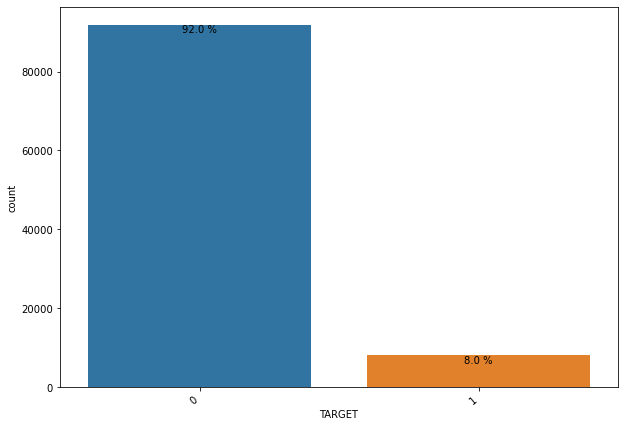

In [74]:
# Plot the graph-
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["TARGET"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40 , ha = "right") 
count = len(df["TARGET"])                                     
for bar in ax.patches:                                                
    percentage = f"{round(bar.get_height()/count, 2)*100} %"
                                                                              
    x = bar.get_x() + bar.get_width() /2                                
    y = bar.get_height()                                               
    ax.annotate(percentage, (x, y), ha = "center", va = "top")          
plt.show()

In [ ]:
#interpretation: according to the data set almost 90% cases are not defaulters and not getting any difficulties.

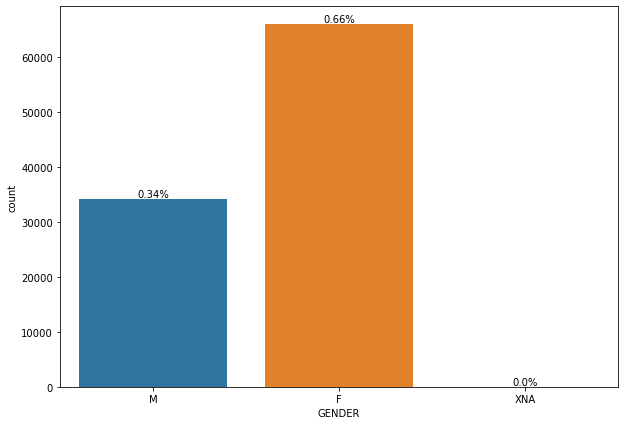

In [70]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["GENDER"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

In [ ]:
#interpretation : females are in higher numbers than male

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [6]:
C1=df[(df.AMT_INCOME_TOTAL<=172439)&(df.AMT_CREDIT<=601645)]
C1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,...,-1588,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,405000.0,...,-2019,1,1,0,1,0,Laborers,1.0,THURSDAY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,216077,0,Cash loans,M,N,Y,0,135000.0,540000.0,540000.0,...,-4242,1,1,0,1,0,Managers,2.0,TUESDAY,1
99990,216081,0,Revolving loans,F,N,Y,1,67500.0,180000.0,180000.0,...,-927,1,1,1,1,0,High skill tech staff,3.0,MONDAY,0
99992,216083,0,Cash loans,F,N,N,0,81000.0,486459.0,342000.0,...,-574,1,1,0,1,0,High skill tech staff,2.0,WEDNESDAY,1
99993,216084,0,Revolving loans,F,N,N,0,90000.0,180000.0,180000.0,...,-491,1,1,1,1,0,Core staff,1.0,TUESDAY,0


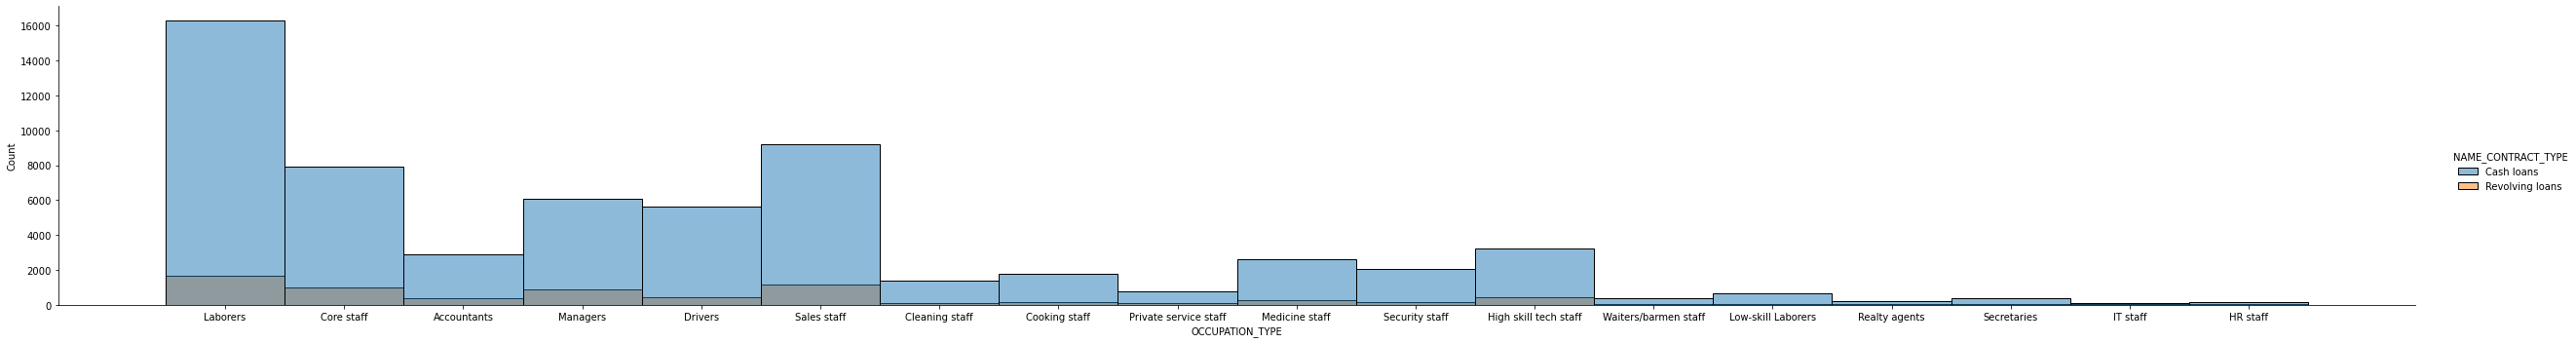

In [7]:
sns.displot(data=df,x="OCCUPATION_TYPE",hue="NAME_CONTRACT_TYPE",aspect=7)

In [8]:
#INTERPREATATION: BASED ON THE DATA AND DIAGRAM ABOVE LABORERS ARE THE PEOPLE WHO NEED CASH TYPE OF LOAN MOST,FOLLOWED BY SALES STAFF AND CORE STAFF.


In [9]:
#CONSIDERING THAT THE CUSTOMER IS A DEFAULTER HE/SHE WILL AVOIDE THESE CRITERIAS FOR LOAN APPROVAL
d1=df[(df.TOTAL_DOC_SUBMITTED==0)&(df.MOBILE_REACHABLE==0)&(df.AMT_CREDIT<=601645)&(df.FLAG_EMAIL==0)]
d1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
9510,111058,0,Revolving loans,F,N,N,0,180000.0,315000.0,315000.0,...,-4713,1,1,0,0,0,Core staff,1.0,MONDAY,0
11418,113292,0,Revolving loans,F,N,Y,0,121500.0,180000.0,180000.0,...,365243,1,0,0,0,0,NaN,2.0,MONDAY,0
18587,121681,0,Revolving loans,F,Y,N,1,90000.0,135000.0,135000.0,...,365243,1,0,0,0,0,NaN,3.0,THURSDAY,0
23813,127706,0,Revolving loans,F,Y,Y,0,157500.0,157500.0,157500.0,...,365243,1,0,0,0,0,NaN,2.0,THURSDAY,0
32338,137492,0,Revolving loans,F,Y,Y,0,180000.0,540000.0,540000.0,...,-3157,1,1,0,0,0,High skill tech staff,2.0,FRIDAY,0
49731,157573,0,Revolving loans,F,N,Y,0,135000.0,180000.0,180000.0,...,-2906,1,1,0,0,0,NaN,2.0,MONDAY,0
50399,158353,1,Revolving loans,F,N,Y,1,112500.0,180000.0,180000.0,...,365243,1,0,0,0,0,NaN,2.0,MONDAY,0
61978,171880,0,Revolving loans,F,N,N,0,157500.0,157500.0,157500.0,...,-3161,1,1,0,0,0,Private service staff,1.0,TUESDAY,0
86332,200191,0,Revolving loans,F,N,Y,1,315000.0,225000.0,225000.0,...,-112,1,1,0,0,0,Sales staff,3.0,THURSDAY,0
94607,209852,0,Revolving loans,M,Y,N,1,315000.0,225000.0,225000.0,...,-328,1,1,0,0,0,Managers,3.0,SATURDAY,0


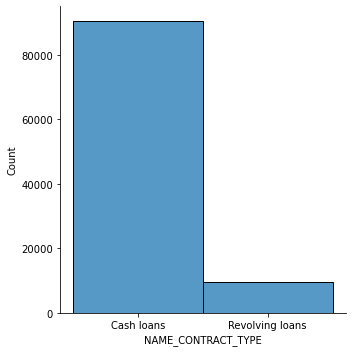

In [10]:
sns.displot(data=df,x="NAME_CONTRACT_TYPE",kde=None)

In [11]:
#INTERPREATATION: ACCORDING TO THE DIAGRAM PEOPLE WHO HAVE NOT SUBMITTED ANY DOCUMENTS,THERE MOBILE IS NOT REACHEABLE,CREDIT AMT IS LESS THAN THE AVG,WITH FLAG EMAIL
# WILL WE CONSIDERED AS DEFAULTERS AND MAXIMUM DEFAULTERS ARE 
# NEEDING THE CASH LOANS .

In [12]:
#CONDITION 2: a family person needs a loan
d2=df[(df.CNT_CHILDREN==1)&(df.MOBILE==1)&(df.MOBILE_REACHABLE==1)&(df.House=="Y")]
d2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,1395000.0,...,-3130,1,1,0,1,0,Accountants,3.0,SUNDAY,2
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,652500.0,...,-679,1,1,0,1,0,Core staff,3.0,SATURDAY,1
17,100021,0,Revolving loans,F,N,Y,1,81000.0,270000.0,270000.0,...,-191,1,1,0,1,0,Laborers,3.0,MONDAY,0
19,100023,0,Cash loans,F,N,Y,1,90000.0,544491.0,454500.0,...,-2038,1,1,1,1,0,Core staff,2.0,MONDAY,1
21,100025,0,Cash loans,F,Y,Y,1,202500.0,1132573.5,927000.0,...,-1652,1,1,0,1,0,Sales staff,3.0,MONDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99961,216051,0,Revolving loans,F,Y,Y,1,90000.0,180000.0,180000.0,...,-1204,1,1,0,1,0,Sales staff,2.0,SATURDAY,0
99970,216060,0,Cash loans,F,Y,Y,1,157500.0,1125000.0,1125000.0,...,-1477,1,1,0,1,0,Core staff,3.0,WEDNESDAY,1
99990,216081,0,Revolving loans,F,N,Y,1,67500.0,180000.0,180000.0,...,-927,1,1,1,1,0,High skill tech staff,3.0,MONDAY,0
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1


<AxesSubplot:xlabel='count', ylabel='NAME_EDUCATION_TYPE'>

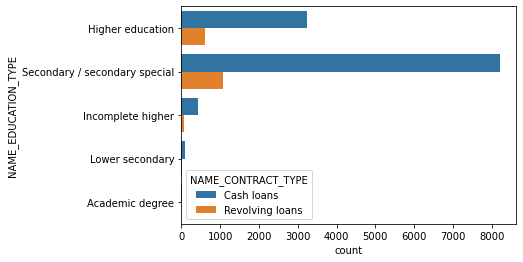

In [13]:
sns.countplot(data=d2,hue="NAME_CONTRACT_TYPE",y="NAME_EDUCATION_TYPE")

In [14]:
#INTERPREATATION: BASED ON THE DATA IF A FAMILY ORRIENTED PERSON NEEDS A LOAN WHO HAVE CHILDREN , MOBILE IS REACHEABLE .
# SO PEOPLE WHO HAVE SECONDARY EDUCATED NEEDS CASH LOANS MORE, FOLLOWED BY PEOPLE WITH HIGHER EDUCATION, AND SAME IS IN REVOLVING LOAN.

In [15]:
#CONDITION 3:
#IF A FEMALE CUSTOMER WITHOUT A FAMILY WANTS A LOAN . AND OCCUPATION TYPE AS Laborers.
d3=df[(df.GENDER=="F")&(df.CNT_CHILDREN==0)&(df.OCCUPATION_TYPE=="Laborers")]
d3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
12,100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,67500.0,...,-2717,1,1,1,1,0,Laborers,2.0,FRIDAY,1
14,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,679500.0,...,-203,1,1,0,1,0,Laborers,2.0,MONDAY,1
18,100022,0,Revolving loans,F,N,Y,0,112500.0,157500.0,157500.0,...,-7804,1,1,0,1,0,Laborers,1.0,FRIDAY,1
32,100037,0,Cash loans,F,N,N,0,90000.0,199008.0,180000.0,...,-4404,1,1,1,1,0,Laborers,2.0,SATURDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99919,216003,0,Cash loans,F,N,N,0,202500.0,180000.0,180000.0,...,-1708,1,1,0,1,0,Laborers,1.0,THURSDAY,1
99929,216014,0,Cash loans,F,N,Y,0,135000.0,533304.0,405000.0,...,-828,1,1,0,1,1,Laborers,2.0,SATURDAY,1
99935,216021,1,Cash loans,F,N,Y,0,243000.0,495882.0,405000.0,...,-1662,1,1,0,1,0,Laborers,2.0,SATURDAY,1
99974,216064,0,Revolving loans,F,Y,Y,0,157500.0,270000.0,270000.0,...,-1317,1,1,0,1,0,Laborers,1.0,TUESDAY,0


<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='NAME_CONTRACT_TYPE'>

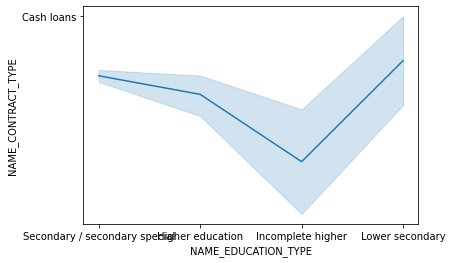

In [16]:
sns.lineplot(data=d3,y="NAME_CONTRACT_TYPE",x="NAME_EDUCATION_TYPE")

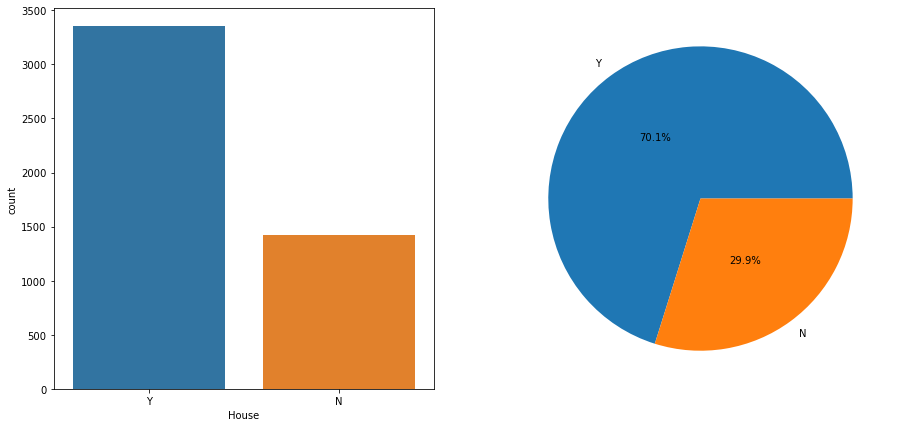

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = d3["House"].value_counts()                                                                                                         
labels =data.keys()                                                
                                                                     
sns.countplot(x = d3["House"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5)
plt.show()

In [18]:
#INTERPREATATION:  THE GRAPH REPRESENT FEMALE WHO ARE FROM LABOUR CATAGEORY WITHOUT A FAMILY NEEDS A CASH LOAN RATHER THAN REVOLVING LOANS,
# PIE CHART REPRESENT THE DATA THAT 70% OF THE POPULATION OF LABOUR CLASS FEMALES HAVE A HOUSE AND 30% 
# SO FROM THE RECORDS IT CAN BE EVALUATED THAT LOANS IS NEEDED FOR EDUCATIONAL PURPOSE.
# ACCORDING TO THE LINE PLOT CASH LOANS ARE REQUIRED FOR SECONDARY EDUCATION.

In [19]:
#CONDITION 3:
#IF A MALE CUSTOMER WITHOUT A FAMILY WANTS A LOAN . AND OCCUPATION TYPE AS Laborers.
d4=df[(df.GENDER=="M")&(df.CNT_CHILDREN==0)&(df.OCCUPATION_TYPE=="Laborers")]
d4

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,...,-1588,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,405000.0,...,-2019,1,1,0,1,0,Laborers,1.0,THURSDAY,0
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,247500.0,...,-1157,1,1,0,1,0,Laborers,1.0,SATURDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99944,216030,0,Cash loans,M,N,Y,0,225000.0,1374480.0,1125000.0,...,-1576,1,1,0,1,0,Laborers,2.0,SUNDAY,1
99948,216034,0,Cash loans,M,Y,Y,0,157500.0,1024740.0,900000.0,...,-2302,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
99952,216040,0,Revolving loans,M,N,N,0,315000.0,675000.0,675000.0,...,-2212,1,1,0,1,0,Laborers,2.0,WEDNESDAY,0
99956,216045,0,Revolving loans,M,N,Y,0,67500.0,180000.0,180000.0,...,-3051,1,1,0,1,0,Laborers,2.0,FRIDAY,0


<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='NAME_CONTRACT_TYPE'>

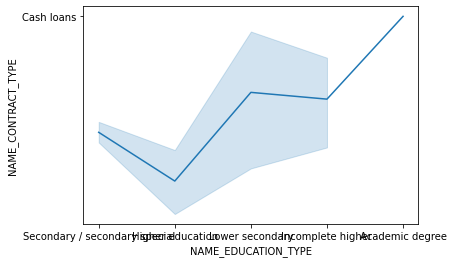

In [20]:
sns.lineplot(data=d4,y="NAME_CONTRACT_TYPE",x="NAME_EDUCATION_TYPE")

In [ ]:
#INTERPREATATION : cash loans increases as the education level increses

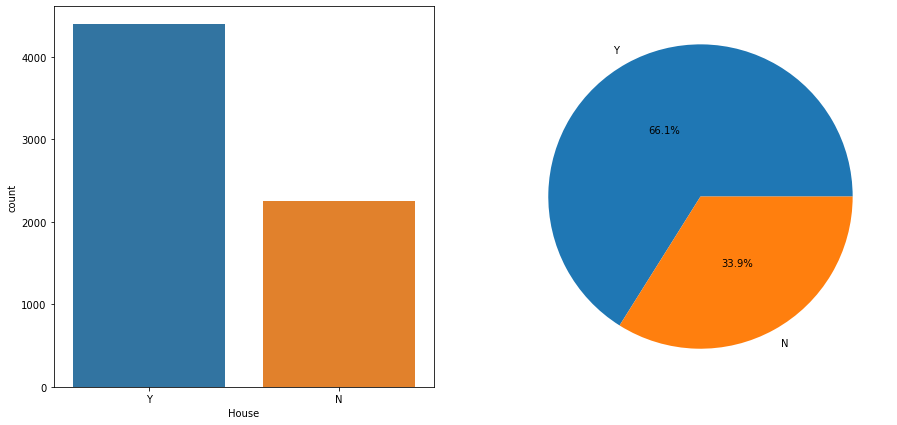

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = d4["House"].value_counts()                                                                                                         
labels =data.keys()                                                
                                                                     
sns.countplot(x = d4["House"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5)
plt.show()

In [22]:
#INTERPREATATION:  THE GRAPH REPRESENT MALE WHO ARE FROM LABOUR CATAGEORY WITHOUT A FAMILY NEEDS A CASH LOAN RATHER THAN REVOLVING LOANS,
# PIE CHART REPRESENT THE DATA THAT 66% OF THE POPULATION OF LABOUR CLASS FEMALES HAVE A HOUSE AND 33% 
# FROM THE RECORDS IT CAN BE CONSIDERED  THAT CASH LOANS INCREASES FROM HIGHER TO LOWER SECONDARY SO THE 
# COLCLUSION IS THAT CASH LOAN IS  NOT NEEDED FOR  EDUCATIONAL PURPOSE.


In [23]:
#CONDITION 4
#CUSTOMERS WHO HAVE CARS AND HOUSE AND STILL WANTS A LOAN AND ARE HIGHLY EDUCATED AND ALSO SINGLE.
d5=df[(df.House=='Y')&(df.Car=='Y')&(df.DAYS_EMPLOYED<=63925)&(df.CNT_CHILDREN==0)]
d5


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,1530000.0,...,-449,1,1,1,1,0,Managers,2.0,MONDAY,1
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,247500.0,...,-1157,1,1,0,1,0,Laborers,1.0,SATURDAY,1
20,100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,427500.0,...,-4286,1,1,0,1,0,Laborers,2.0,FRIDAY,0
28,100033,0,Cash loans,M,Y,Y,0,270000.0,790830.0,675000.0,...,-1796,1,1,0,1,1,NaN,1.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99975,216066,0,Cash loans,M,Y,Y,0,315000.0,946503.0,846000.0,...,-735,1,1,0,1,0,Drivers,2.0,WEDNESDAY,1
99984,216075,0,Cash loans,F,Y,Y,0,225000.0,513531.0,459000.0,...,-5127,1,1,0,1,0,Sales staff,1.0,FRIDAY,1
99985,216076,0,Cash loans,M,Y,Y,0,157500.0,445500.0,445500.0,...,-803,1,1,0,1,0,Drivers,2.0,SATURDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1


([<matplotlib.patches.Wedge at 0x12426198e80>,
 [Text(-0.2693450869564311, 1.0665145212946858, 'M'),
  Text(0.2690778684093446, -1.0665819709390758, 'F'),
  Text(1.099999965464032, -0.0002756431176148664, 'XNA')],
 [Text(-0.12242958498019596, 0.48477932786122074, '57.9%'),
  Text(0.12230812200424755, -0.484809986790489, '42.1%'),
  Text(0.49999998430183273, -0.00012529232618857563, '0.0%')])

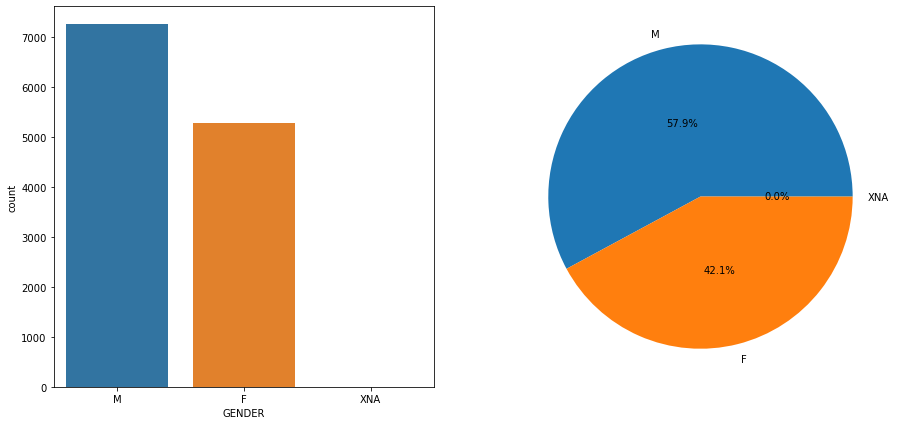

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = d5["GENDER"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = d5["GENDER"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5)

<AxesSubplot:xlabel='count', ylabel='NAME_EDUCATION_TYPE'>

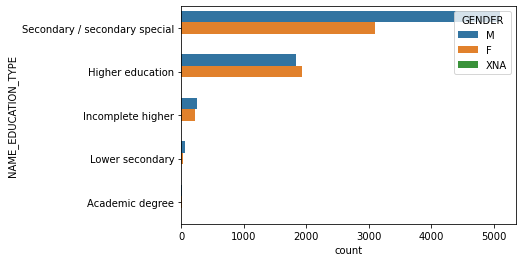

In [25]:
sns.countplot(data=d5,hue="GENDER",y="NAME_EDUCATION_TYPE")

In [26]:
#INTERPREATATION : THE NUMBER OF MALE POPULATION (59%) IS MUCH HIGHER THAN FEMALE POPULATION(41%),
# WHO ARE NEWLY EMPLOYED BECAUSE THERE AVERAGE DAYS EMPLOYED IS LESS THAN THE AVERAGE VALUE OF 63925 WHO OWNS A CAR AND HOUSE 
# AND ARE WITHOUT CHILDREN . AND FROM THE GRAPH ABOVE IT IS CLEAR THAT BOTH MALE AND FEMALE POPULATION  HAVE MAX OF SECONDARY EDUCATION.

In [27]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [28]:
#CONDITION 6
# FEMALE CUSTOMER WHO  DON'T HAVE CHILDREN AND ARE ARE SINGLE WHAT TYPE OF LOAN DO THEY WANT
d6=df[(df.CNT_CHILDREN==0)&(df.CNT_FAM_MEMBERS==1)&(df.GENDER=="F")]
d6

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
18,100022,0,Revolving loans,F,N,Y,0,112500.0,157500.0,157500.0,...,-7804,1,1,0,1,0,Laborers,1.0,FRIDAY,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,702000.0,...,-2628,1,1,0,1,0,Cooking staff,1.0,MONDAY,2
43,100050,0,Cash loans,F,N,Y,0,108000.0,746280.0,675000.0,...,365243,1,0,0,1,0,NaN,1.0,WEDNESDAY,1
46,100053,0,Cash loans,F,N,Y,0,202500.0,305221.5,252000.0,...,365243,1,0,0,1,0,NaN,1.0,MONDAY,1
56,100064,0,Cash loans,F,N,N,0,67500.0,298728.0,202500.0,...,365243,1,0,0,1,0,NaN,1.0,MONDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99960,216050,0,Cash loans,F,N,N,0,270000.0,781920.0,675000.0,...,-717,1,1,0,1,0,Core staff,1.0,SATURDAY,2
99968,216058,0,Cash loans,F,N,N,0,171000.0,592560.0,450000.0,...,-1222,1,1,0,1,0,Accountants,1.0,SUNDAY,1
99974,216064,0,Revolving loans,F,Y,Y,0,157500.0,270000.0,270000.0,...,-1317,1,1,0,1,0,Laborers,1.0,TUESDAY,0
99984,216075,0,Cash loans,F,Y,Y,0,225000.0,513531.0,459000.0,...,-5127,1,1,0,1,0,Sales staff,1.0,FRIDAY,1


<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='NAME_CONTRACT_TYPE'>

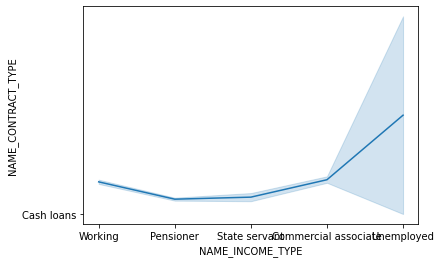

In [42]:
sns.lineplot(data=d6,y="NAME_CONTRACT_TYPE",x="NAME_INCOME_TYPE")

In [30]:
#INTERPREATATION : FROM THE LINE GRAPH IT IS CLEAR THAT WHO ARE EITHER FROM ASSOCIATE ROLES OR ARE UNEMPLOYEED NEEDS MORE REVOLVING LOANS RATHER THAN CASH LOANS

<AxesSubplot:xlabel='count', ylabel='APPLICATION_DAY'>

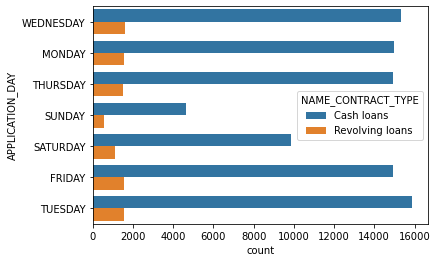

In [31]:
#CONDITION 7 : ON WHICH DAYS MOST NO OF LOANS ARE REQUESTED
sns.countplot(data=df,y="APPLICATION_DAY",hue="NAME_CONTRACT_TYPE")

In [32]:
#INTERPREATATION : ON TUESDAYS  WEDNESDAYS AND MONDAYS MOST NO OF LOANS ARE REQUESTED FOR CASH TYPE

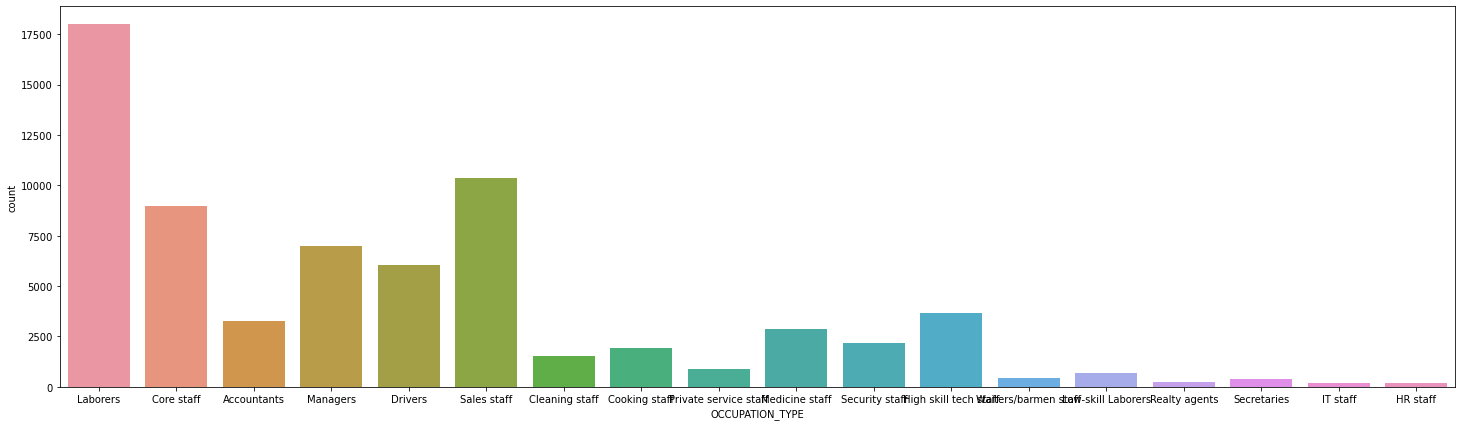

In [115]:
plt.figure(figsize=(25,7))
sns.countplot(data=df,x="OCCUPATION_TYPE")
plt.show()

<AxesSubplot:xlabel='TARGET', ylabel='count'>

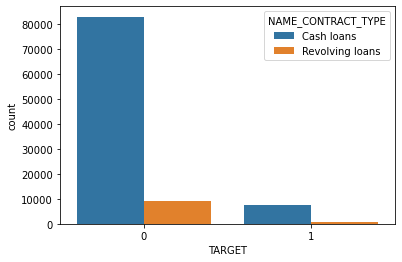

In [45]:
sns.countplot(data=df,x="TARGET",hue="NAME_CONTRACT_TYPE")

In [ ]:
#INTERPREATATION : with this plot we can say that there is no such difficulties in cash loans or revolving loans.

In [46]:
d3=df[(df.GENDER=='F')&(df.Car=='Y')&(df.House=='Y')]
d3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,1395000.0,...,-3130,1,1,0,1,0,Accountants,3.0,SUNDAY,2
21,100025,0,Cash loans,F,Y,Y,1,202500.0,1132573.5,927000.0,...,-1652,1,1,0,1,0,Sales staff,3.0,MONDAY,1
66,100078,0,Cash loans,F,Y,Y,0,180000.0,1035000.0,1035000.0,...,-4856,1,1,0,1,0,Core staff,2.0,TUESDAY,1
86,100101,0,Cash loans,F,Y,Y,0,202500.0,343377.0,283500.0,...,-969,1,1,0,1,0,High skill tech staff,1.0,WEDNESDAY,1
109,100129,0,Revolving loans,F,Y,Y,1,85500.0,135000.0,135000.0,...,-225,1,1,0,0,0,NaN,3.0,MONDAY,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99969,216059,0,Cash loans,F,Y,Y,0,243000.0,835380.0,675000.0,...,-731,1,1,0,1,0,Managers,2.0,MONDAY,1
99970,216060,0,Cash loans,F,Y,Y,1,157500.0,1125000.0,1125000.0,...,-1477,1,1,0,1,0,Core staff,3.0,WEDNESDAY,1
99974,216064,0,Revolving loans,F,Y,Y,0,157500.0,270000.0,270000.0,...,-1317,1,1,0,1,0,Laborers,1.0,TUESDAY,0
99984,216075,0,Cash loans,F,Y,Y,0,225000.0,513531.0,459000.0,...,-5127,1,1,0,1,0,Sales staff,1.0,FRIDAY,1


<AxesSubplot:xlabel='count', ylabel='TARGET'>

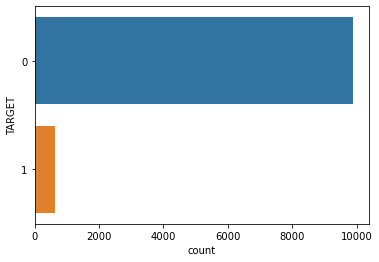

In [47]:
sns.countplot(data=d3,y="TARGET")

In [49]:
d2=df[(df.GENDER=='F')&(df.Car=='N')&(df.House=='N')]
d2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
22,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,450000.0,...,-4306,1,1,0,1,0,Sales staff,3.0,THURSDAY,1
32,100037,0,Cash loans,F,N,N,0,90000.0,199008.0,180000.0,...,-4404,1,1,1,1,0,Laborers,2.0,SATURDAY,1
35,100041,0,Cash loans,F,N,N,0,112500.0,450000.0,450000.0,...,-1275,1,1,1,1,0,Sales staff,2.0,MONDAY,1
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,238500.0,...,-3597,1,1,1,1,0,Sales staff,2.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99960,216050,0,Cash loans,F,N,N,0,270000.0,781920.0,675000.0,...,-717,1,1,0,1,0,Core staff,1.0,SATURDAY,2
99968,216058,0,Cash loans,F,N,N,0,171000.0,592560.0,450000.0,...,-1222,1,1,0,1,0,Accountants,1.0,SUNDAY,1
99973,216063,0,Cash loans,F,N,N,0,337500.0,728460.0,675000.0,...,-1375,1,1,1,1,0,NaN,2.0,FRIDAY,1
99992,216083,0,Cash loans,F,N,N,0,81000.0,486459.0,342000.0,...,-574,1,1,0,1,0,High skill tech staff,2.0,WEDNESDAY,1


<AxesSubplot:xlabel='count', ylabel='TARGET'>

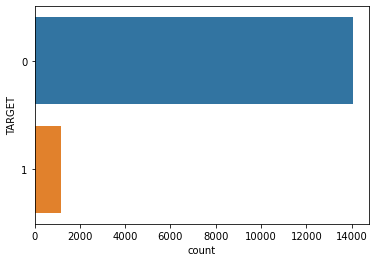

In [50]:
sns.countplot(data=d2,y="TARGET")

In [ ]:
#interpretation: there is no such difference on difficulties of female customers with the house or cars availble or not.

In [51]:
d4=df[(df.GENDER=='M')&(df.Car=='Y')&(df.House=='Y')]
d4

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,1530000.0,...,-449,1,1,1,1,0,Managers,2.0,MONDAY,1
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,247500.0,...,-1157,1,1,0,1,0,Laborers,1.0,SATURDAY,1
20,100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,427500.0,...,-4286,1,1,0,1,0,Laborers,2.0,FRIDAY,0
28,100033,0,Cash loans,M,Y,Y,0,270000.0,790830.0,675000.0,...,-1796,1,1,0,1,1,NaN,1.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99955,216044,0,Cash loans,M,Y,Y,1,180000.0,497520.0,450000.0,...,-165,1,1,0,1,0,Drivers,2.0,THURSDAY,1
99975,216066,0,Cash loans,M,Y,Y,0,315000.0,946503.0,846000.0,...,-735,1,1,0,1,0,Drivers,2.0,WEDNESDAY,1
99976,216067,0,Cash loans,M,Y,Y,0,180000.0,1002870.0,922500.0,...,365243,1,0,0,1,0,NaN,2.0,MONDAY,1
99985,216076,0,Cash loans,M,Y,Y,0,157500.0,445500.0,445500.0,...,-803,1,1,0,1,0,Drivers,2.0,SATURDAY,1


<AxesSubplot:xlabel='count', ylabel='TARGET'>

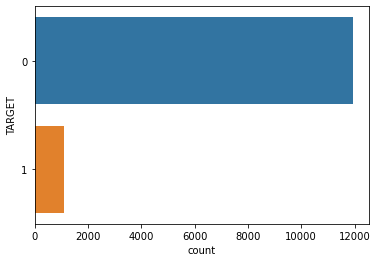

In [52]:
sns.countplot(data=d4,y="TARGET")

In [53]:
d5=df[(df.GENDER=='M')&(df.Car=='N')&(df.House=='N')]
d5

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
16,100020,0,Cash loans,M,N,N,0,108000.0,509602.5,387000.0,...,-1317,1,1,0,1,0,Drivers,2.0,THURSDAY,1
61,100072,0,Cash loans,M,N,N,0,180000.0,1080000.0,1080000.0,...,-1324,1,1,0,1,1,Sales staff,1.0,TUESDAY,0
70,100082,0,Cash loans,M,N,N,2,180000.0,450000.0,450000.0,...,-2844,1,1,1,1,0,Laborers,4.0,MONDAY,1
129,100151,0,Cash loans,M,N,N,0,135000.0,182016.0,144000.0,...,-1451,1,1,0,1,0,Accountants,1.0,MONDAY,1
132,100154,0,Revolving loans,M,N,N,0,144000.0,180000.0,180000.0,...,-2995,1,1,0,1,0,Drivers,2.0,THURSDAY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99933,216018,0,Cash loans,M,N,N,1,292500.0,635193.0,585000.0,...,-168,1,1,0,1,0,Laborers,3.0,WEDNESDAY,1
99934,216019,0,Cash loans,M,N,N,0,135000.0,553806.0,495000.0,...,-191,1,1,0,1,0,Laborers,2.0,FRIDAY,1
99952,216040,0,Revolving loans,M,N,N,0,315000.0,675000.0,675000.0,...,-2212,1,1,0,1,0,Laborers,2.0,WEDNESDAY,0
99967,216057,1,Cash loans,M,N,N,0,54000.0,360000.0,360000.0,...,-3190,1,1,1,1,0,Core staff,1.0,THURSDAY,1


<AxesSubplot:xlabel='count', ylabel='TARGET'>

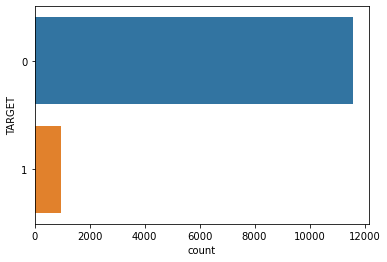

In [54]:
sns.countplot(data=d5,y="TARGET")

In [ ]:
#interpretation: there is no such difference on difficulties of male customers with the house or cars availble or not.

In [ ]:
 169426

In [92]:
d6=df[df.AMT_INCOME_TOTAL>=169426]
d6

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,1395000.0,...,-3130,1,1,0,1,0,Accountants,3.0,SUNDAY,2
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,1530000.0,...,-449,1,1,1,1,0,Managers,2.0,MONDAY,1
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,697500.0,...,-3028,1,1,0,1,0,Drivers,3.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,216080,0,Cash loans,F,N,Y,0,180000.0,1546020.0,1350000.0,...,-2250,1,1,0,1,0,Laborers,2.0,MONDAY,1
99991,216082,0,Cash loans,M,Y,N,2,270000.0,450000.0,450000.0,...,-5525,1,1,0,1,0,Managers,4.0,MONDAY,1
99994,216085,0,Cash loans,M,Y,N,0,225000.0,612000.0,612000.0,...,-135,1,1,0,1,0,Laborers,2.0,SATURDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1


<AxesSubplot:xlabel='TARGET', ylabel='Count'>

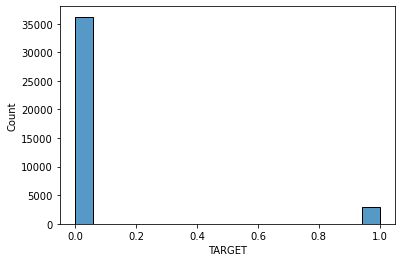

In [93]:
sns.histplot(data=d6,x="TARGET")

#interpretation: from this graph we can say that customers who have the income higher that than the average than there is less 
difficulties

In [94]:
d7=df[df.AMT_CREDIT<=599003]
d7      

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,...,-1588,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,216083,0,Cash loans,F,N,N,0,81000.0,486459.0,342000.0,...,-574,1,1,0,1,0,High skill tech staff,2.0,WEDNESDAY,1
99993,216084,0,Revolving loans,F,N,N,0,90000.0,180000.0,180000.0,...,-491,1,1,1,1,0,Core staff,1.0,TUESDAY,0
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


<AxesSubplot:xlabel='TARGET', ylabel='Count'>

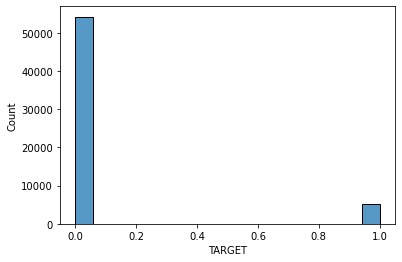

In [95]:
sns.histplot(data=d7,x="TARGET")

#interpretation: from this graph we can say that customers who have the credit limit lower that than the average than there is less 
difficulties

In [71]:
info_of_cat( "NAME_EDUCATION_TYPE")

Unique values in NAME_EDUCATION_TYPE are: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Mode of NAME_EDUCATION_TYPE is Secondary / secondary special
Number of missing values in NAME_EDUCATION_TYPE is 0


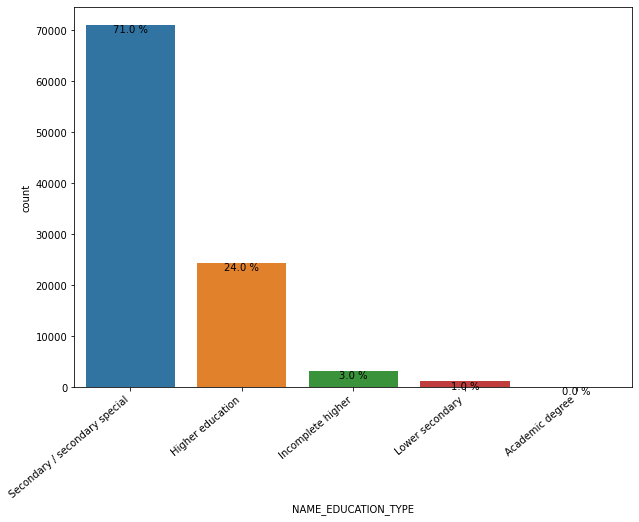

In [73]:
-
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["NAME_EDUCATION_TYPE"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40 , ha = "right") 
count = len(df["NAME_EDUCATION_TYPE"])                                     
for bar in ax.patches:                                                
    percentage = f"{round(bar.get_height()/count, 2)*100} %"
                                                                              
    x = bar.get_x() + bar.get_width() /2                                
    y = bar.get_height()                                               
    ax.annotate(percentage, (x, y), ha = "center", va = "top")          
plt.show()

In [ ]:
#interpretation: 71% of customers have the eduacation degree of secondry or secondry special

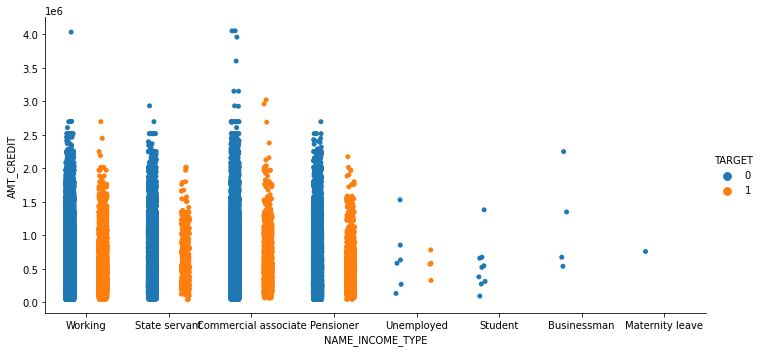

In [116]:
sns.catplot(data=df,x='NAME_INCOME_TYPE',y='AMT_CREDIT',hue='TARGET',dodge='True',aspect=2)

In [ ]:
#interpretation: according to this chart commercial associate are more likely to get the loan and will less defaulters

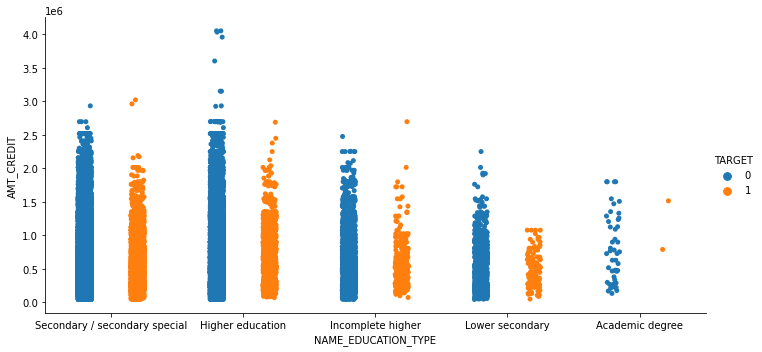

In [117]:
sns.catplot(data=df,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='TARGET',dodge='True',aspect=2)

In [ ]:
#interpreatation: customer of higher education will get the loan easily and can have the less defaulters.

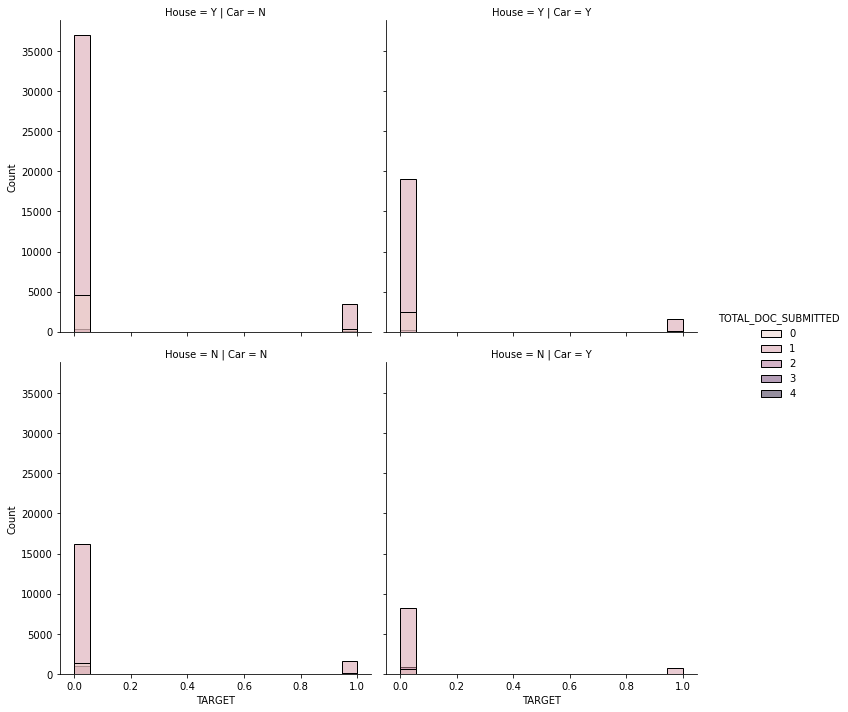

In [119]:
sns.displot(data=df,x='TARGET',hue='TOTAL_DOC_SUBMITTED',col='Car',row='House')

In [ ]:
#interpretation: customers who have the car and house and submitted atleast 1 or 2 documents are no likly to be the defaulters

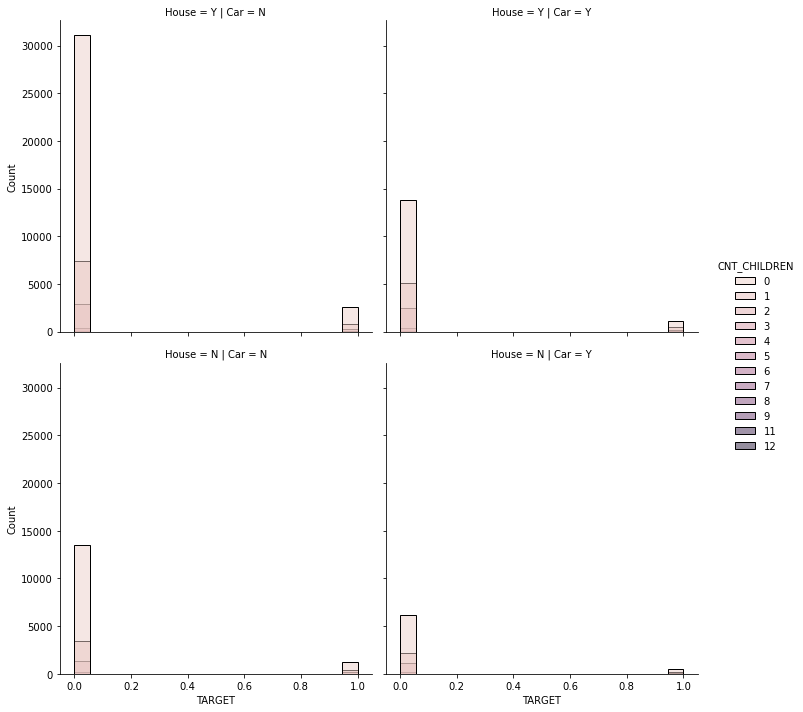

In [120]:
sns.displot(data=df,x='TARGET',hue='CNT_CHILDREN',col='Car',row='House')

# recomendation

education: on the basis of education bank shoould go with secondry level or higher education customers so there can be less difficulties 

income: income sholud be higher than than the average for less difficulties 

credit limit: credit limit sholud be lower than than the average for less difficulties 

occupation: on the occupation side bank can go for the labor to face less difficulties

house & car: we can also recommend that the bank sholud go with the customers who have house and car to get less defaulters to keep them as collatrel 